# Bonus point

# Import and read files

In [90]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from nltk import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import defaultdict
import string

In [2]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from gensim import corpora, models

/home/stefano/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [5]:
emails = pd.read_csv('hillary-clinton-emails/sentimentEmails.csv')
emails=emails[['ProcessedData']]
emails.head()

,ProcessedData
0,h : latest : syria aid qaddafi ... sid b6 thur...
1,chris stevens thx
2,h : latest : syria aid qaddafi ... sid h < hro...
3,right - wing extremist behind anti - muslim fi...
4,h : latest : syria aid qaddafi ... sid h < hro...


In [6]:
fullDF = pd.read_csv('hillary-clinton-emails/Emails.csv')

In [7]:
fullDF.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [8]:
fullDF.shape

(7945, 22)

In [9]:
emails.shape

(6456, 1)

# Merge the 2 databases

In [10]:
bodyDF=fullDF[['ExtractedBodyText','MetadataSubject']]

In [11]:
reducedDF=fullDF[np.sum(bodyDF.isnull(),axis=1)==0]

In [12]:
reducedDF.shape

(6456, 22)

In [13]:
reducedDF=reducedDF.reset_index()
del reducedDF['index']

In [14]:
# reducedDF=reducedDF.reset_index(drop=True)
reducedDF.head(2)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
1,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...


In [15]:
emails.head(3)

,ProcessedData
0,h : latest : syria aid qaddafi ... sid b6 thur...
1,chris stevens thx
2,h : latest : syria aid qaddafi ... sid h < hro...


In [16]:
reducedDF['ProcessedData']=emails.ProcessedData
reducedDF.head(3)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,ProcessedData
0,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,h : latest : syria aid qaddafi ... sid b6 thur...
1,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,chris stevens thx
2,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,h : latest : syria aid qaddafi ... sid h < hro...


# Process the reduced DF

In [17]:
reducedDF.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText', 'ProcessedData'],
      dtype='object')

In [18]:
finalDF=reducedDF[['Id','SenderPersonId','ProcessedData']]

In [19]:
finalDF=finalDF.dropna()
finalDF=finalDF.set_index(finalDF.Id)
del finalDF['Id']
finalDF.head()

,SenderPersonId,ProcessedData
Id,,
3,32.0,chris stevens thx
5,80.0,h : latest : syria aid qaddafi ... sid h < hro...
6,80.0,right - wing extremist behind anti - muslim fi...
8,80.0,h : latest : syria aid qaddafi ... sid h < hro...
9,87.0,secretary ' remark fyi


In [20]:
finalDF.SenderPersonId=finalDF.SenderPersonId.apply(lambda x: int(x))

In [21]:
finalDF.loc[3].SenderPersonId

32

In [22]:
finalDF.shape

(6433, 2)

In [23]:
len(finalDF.SenderPersonId.value_counts())

105

In [50]:
finalDF[finalDF.SenderPersonId==104]

,SenderPersonId,ProcessedData
Id,,
6537,104,update update heidi report hospital morning mi...


# Reading EmailReceivers

In [33]:
email_receivers=pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')
email_receivers=email_receivers.set_index(email_receivers.Id)
del email_receivers['Id']

In [34]:
len(set(email_receivers.PersonId))

418

In [35]:
max(email_receivers.EmailId)

7945

In [37]:
def add_sender(x):
    try:
        x['Sender']=finalDF.loc[x.EmailId.iloc[0]].SenderPersonId
    except:
        x['Sender']=float('nan')
    return x

In [38]:
email_receivers=email_receivers.groupby(email_receivers.EmailId).apply(add_sender)

In [52]:
email_receivers[email_receivers.EmailId==6536]

,EmailId,PersonId,Sender
Id,,,


In [39]:
email_receivers.head()

,EmailId,PersonId,Sender
Id,,,
1,1,80,NaN
2,2,80,NaN
3,3,228,32.0
4,3,80,32.0
5,4,80,NaN


In [40]:
email_receivers=email_receivers.dropna()
email_receivers.Sender=email_receivers.Sender.apply(lambda x: int(x))
email_receivers.head()

,EmailId,PersonId,Sender
Id,,,
3,3,228,32
4,3,80,32
6,5,81,80
7,6,185,80
9,8,81,80


In [42]:
len(email_receivers.Sender.value_counts())

104

# Trying the libraries

In [43]:
graph=nx.Graph()
for a, b in email_receivers[['Sender','PersonId']].itertuples(index=False):
    graph.add_edge(a,b)

In [44]:
partition=community.best_partition(graph)

In [45]:
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8}

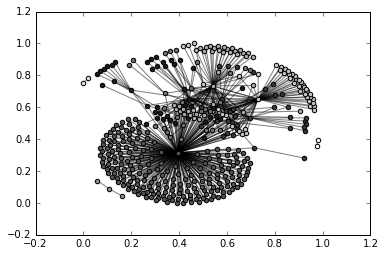

In [46]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(graph,pos, alpha=0.5)
plt.show()

# Add in finalDF a column with the community of the sender

In [58]:
def add_community(x):
    try:
        x['Community']=int(partition[x.SenderPersonId.iloc[0]])
    except:
        x['Community']=float('nan')
    return x

In [59]:
finalDF.head(2)

,SenderPersonId,ProcessedData,Community
Id,,,
3,32,chris stevens thx,6.0
5,80,h : latest : syria aid qaddafi ... sid h < hro...,2.0


In [63]:
finalDF=finalDF.groupby(finalDF.SenderPersonId).apply(add_community)
finalDF=finalDF.dropna()

In [64]:
finalDF.Community=finalDF.Community.apply(lambda x: int(x))

In [65]:
finalDF.head(4)

,SenderPersonId,ProcessedData,Community
Id,,,
3,32,chris stevens thx,6
5,80,h : latest : syria aid qaddafi ... sid h < hro...,2
6,80,right - wing extremist behind anti - muslim fi...,2
8,80,h : latest : syria aid qaddafi ... sid h < hro...,2


In [73]:
finalDF.Community.value_counts()

2    1973
6    1440
0     953
5     869
1     602
3     591
4       2
7       1
8       1
Name: Community, dtype: int64

In [75]:
categories_list=list(set(partition.values()))

In [76]:
categories_list

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [117]:
trivial_words = ['u','f','w','h','j','us','fyi','would','fw','get',"--","—"]

In [161]:
for cat in categories_list:
    df_community=finalDF[finalDF.Community==cat]
    text_string=' '.join(list(df_community.ProcessedData)).split(' ')
    text_string=[x for x in text_string if x[0] not in string.punctuation and not x.isdigit() and x not in trivial_words]
    
    total_dictionary={}
    for s in text_string:
        try:
            total_dictionary[s]+=1
        except:
            total_dictionary[s]=1
    
    words=[]
    cont=0
    while cont<20:
        word=max(total_dictionary, key=lambda k: total_dictionary[k])
        del total_dictionary[word]
        words.append(word)
        cont+=1
    print('Community',cat,':',' '.join(words))
    print()

Community 0 : state agreement unite benghazi department president case people house subject information security today government date secretary statement produce iran select

Community 1 : state women clinton time issue foreign come policy obama afghanistan president take secretary department support house government people world like

Community 2 : state com pls gov clintonemail hrod17 thx time ok print schedule thank let tomorrow send sid pis good like ask

Community 3 : office secretary state room department en arrive route depart private residence time conference schedule house daily staff airport brief white

Community 4 : un settlements people e haitian government plan g could latrines though au prince include port committee least settlement security ingo

Community 5 : state tomorrow huma abedin today gov abedinh confirm send time come ask draft secretary speech ok fax report foreign tell

Community 6 : state obama president time • party house right american israel government p